In [ ]:
!!pip install pandas
!!pip install matplotlib
!!pip install scipy

# Global

In [119]:
import pandas as pd;
import os;
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
from scipy.fft import fft, fftfreq

In [188]:
files_2_order_map = {}

# n in [1,19] && n in [35, 51]
for n in range(1, 20):
    files_2_order_map[n] = n
for n in range (35, 52):
    files_2_order_map[n] = 14 + n

#n in [20, 34]
for n in range(0, 15):
    files_2_order_map[20 + n] = 20 + 2*n


{
    "20": 20,
    "21": 22,
    "22": 24,
    "23": 26,
    "24": 28,
    "25": 30,
    "26": 32,
    "27": 34,
    "28": 36,
    "29": 38,
    "30": 40,
    "31": 42,
    "32": 44,
    "33": 46,
    "34": 48,
    "35": 49,
    "36": 50,
    "37": 51,
    "38": 52,
    "39": 53,
    "40": 54,
    "41": 55,
    "42": 56,
    "43": 57,
    "44": 58,
    "45": 59,
    "46": 60,
    "47": 61,
    "48": 62,
    "49": 63,
    "50": 64,
    "51": 65
}


In [166]:
def read_file(path):
    df = pd.read_csv(path, sep='\\s+', header=None)[[2, 3]]
    df.columns = ['k', 'v']
    return df

def read_all(path, file_name):
    dfs = []
    for dir_name in os.listdir(path):
        file = read_file(os.path.join(path, dir_name, file_name));
        dfs.append(file)
    return dfs

def calc_wave_num(len):
    k_min = 2 * np.pi / 21.2677242
    return np.arange(k_min, (len + 1) * k_min, k_min)

def dfs_2_plotable(dfs):
    return dfs[0].iloc[:, 0].values, calc_wave_num(len(dfs)), np.array([df.iloc[:, 1].values for df in dfs])

# 1. Corellation density-density

In [14]:
def plot_surf(x, y, z, evel = 0, azim = 0):
    X, Y = np.meshgrid(x, y)

    fig = go.Figure(data=[go.Surface(z=z, x=X, y=Y)])
    fig.update_layout(width=1000, height=1000, scene=dict(
        xaxis_title='t [ps]',
        yaxis_title='k [Å^-1]'
    ))

    fig.show()


In [22]:
def read_n_plot(file_name):
    dfs = read_all('./data', file_name)
    x, y, z = dfs_2_plotable(dfs)
    plot_surf(x, y, z) 
    # r = [
    #     df.iloc[-1]['v'] for df in dfs
    # ]
    # plt.plot(r)
    return dfs

dfs = read_n_plot('ektd.0')

# 2. Correlation density-density: dinamic structure factor

In [102]:
def plot_ft(values, dt):
    F = fft(values)
    freq = fftfreq(2000, d=dt)

    plt.figure(figsize=(10, 10))
    plt.plot(freq, np.abs(F))
    # plt.xlim(-10, 10)

    return np.abs(F), freq
    
def plot_ft_surf(file_name):
    dfs = read_all('./data', file_name)

    x, y, z = dfs_2_plotable(dfs)
    z_ft = np.fft.fft(z)
    z_ft_cut = np.where(np.abs(z_ft) > 10, 0, z_ft)
    dt = dfs[0]['k'][1] - dfs[0]['k'][0]
    x = np.fft.fftfreq(2000, d=dt)

    X, Y = np.meshgrid(x, y)

    fig = go.Figure(data=[go.Surface(z=np.abs(z_ft_cut), x=X, y=Y)])
    fig.update_layout(
        width=1000, 
        height=1000, 
        scene=dict(
            xaxis_title='ω [Hz]',
            yaxis_title='k [Å^-1]',
        ),
    )

    fig.show()

In [ ]:
plot_ft_surf('ektd.0')

In [170]:
dfs = read_all('./data', 'ektd.0')

In [187]:
# values = []
# for df in dfs:
#     values.append(df['k'][1])
# plt.plot(values)

# plt.show()

# df = read_file(os.path.join('./data', str(files_2_order_map[32]), 'ektd.0'))
# df
dfs[32]
files_2_order_map[32]


44

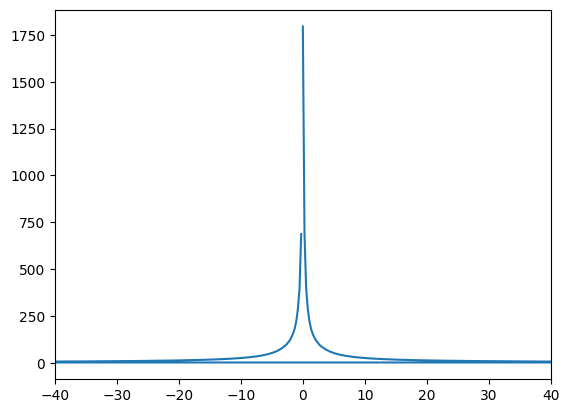

1.4664782377983832


In [84]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

p, _ = find_peaks(m)
plt.plot(f, m)
plt.plot(f[p], m[p], 'x')
plt.xlim(-40, 40)

plt.show()


# np.max(m[p]) if p == [] else None
print(np.max(m[p]) if p.size > 0 else None)